### Основные алгоритмы машинного обучения для задач классификации и регрессии.
### Метрики качества классификации и регрессии

### Введение 

### Классификация - Прогнозирование метки класса
- Спам/Нормальное сообщение 
- Тип автомобиля (грузовик, легковая)


### Регрессия - Прогнозирование непрерывного числа, числа с плавающей точкой, float number 
- Годовой доход сотрудника 
- Стоимость страхового полиса 
- объем урожая
Ключевое отличие 
- классификации от регрессии, это наличие непрерывности (преемственности ) в получаемом ответе, значение 400 и 399 являются одинаково нормальными и близкими к необходимым ответам. 

Импортируем необходимые библиотеки 


In [122]:
%matplotlib inline
# from preamble import *
# библиотеки для работы с матрицам
import pandas as pd
import numpy as np

# Предварительная часть
from sklearn.decomposition import PCA
# Разделение выборки 
from sklearn.model_selection import train_test_split

# Оценка результатов
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Модели классификации
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# загрузка набора данных для классификации 
from sklearn.datasets import load_breast_cancer

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

# Классификация 

TODO Пример набора данных  

In [ ]:
# Гипотезу 
# SQL Excel, Redis, ClickHouse
# Признаковое пространство, целевая переменная 

In [172]:
cancer = load_breast_cancer()
print("названия признаков:\n", cancer.keys())

названия признаков:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [173]:
print("Размерность данных:", cancer.data.shape)

Размерность данных: (569, 30)


In [174]:
print("Количество экземпляров на каждый класс:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Количество экземпляров на каждый класс:
 {'malignant': 212, 'benign': 357}


Используя pandas создадим таблицу для последующей работы в ней

In [175]:
# создание dataframe из текущего набора данных 
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
# Отдельная таблица с целевым признаком 
df_target = pd.DataFrame(cancer.target, columns=['target'])
# Соединение таблицы с зависимыми и целевыми признаками
df = df.merge(df_target,left_index=True, right_index=True)

In [180]:
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

In [181]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

array([[<AxesSubplot:title={'center':'mean radius'}>,
        <AxesSubplot:title={'center':'mean texture'}>,
        <AxesSubplot:title={'center':'mean smoothness'}>,
        <AxesSubplot:title={'center':'mean compactness'}>,
        <AxesSubplot:title={'center':'mean concavity'}>],
       [<AxesSubplot:title={'center':'mean concave points'}>,
        <AxesSubplot:title={'center':'mean symmetry'}>,
        <AxesSubplot:title={'center':'mean fractal dimension'}>,
        <AxesSubplot:title={'center':'radius error'}>,
        <AxesSubplot:title={'center':'texture error'}>],
       [<AxesSubplot:title={'center':'perimeter error'}>,
        <AxesSubplot:title={'center':'area error'}>,
        <AxesSubplot:title={'center':'smoothness error'}>,
        <AxesSubplot:title={'center':'compactness error'}>,
        <AxesSubplot:title={'center':'concavity error'}>],
       [<AxesSubplot:title={'center':'concave points error'}>,
        <AxesSubplot:title={'center':'symmetry error'}>,
        <Axe

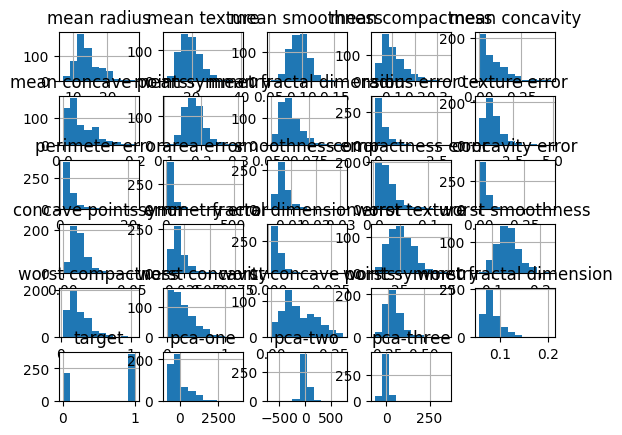

In [190]:
df.hist()

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Визуализация признакового пространства снижением размерности используя метод главных компонент

In [183]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Объясненная вариация по основному компоненту: {}'.format(pca.explained_variance_ratio_))

Объясненная вариация по основному компоненту: [0.98204444 0.01617648 0.00155751]


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

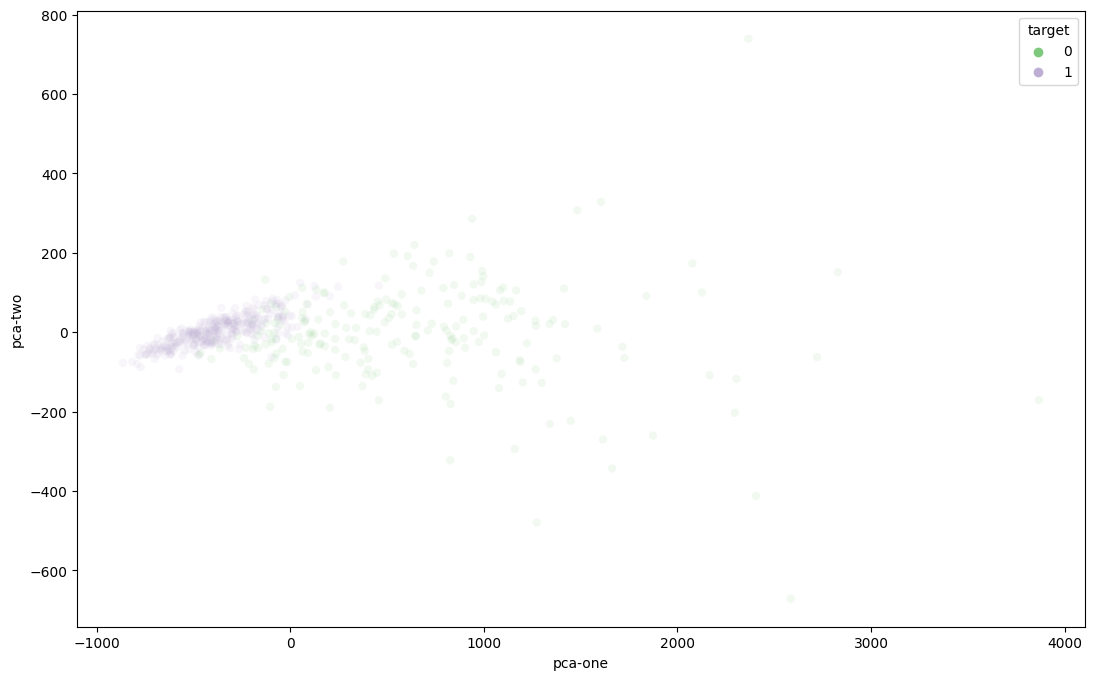

In [184]:
plt.figure(figsize=(13,8))
sns.scatterplot(
    x="pca-one", y="pca-two", hue="target",
    palette=sns.color_palette("Accent", 2),
    data=df,
    legend="full",
    alpha=0.1
)

<ipython-input-185-51dec33ce037>:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(13,8)).gca(projection='3d')


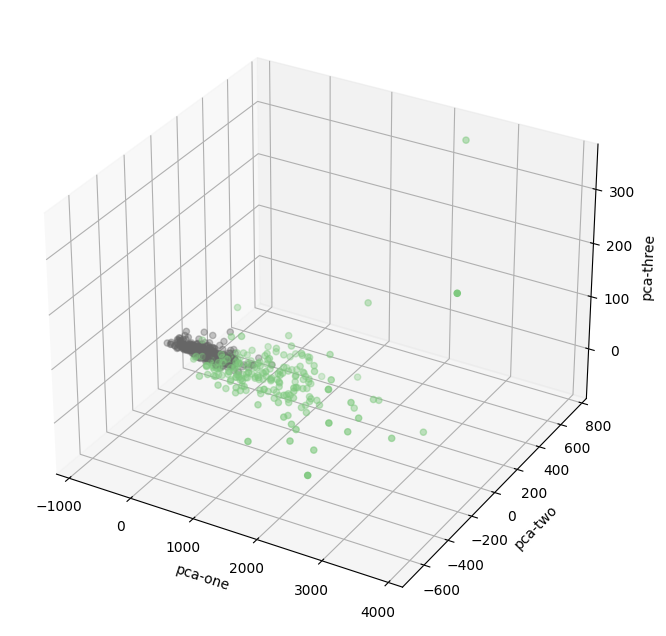

In [185]:
ax = plt.figure(figsize=(13,8)).gca(projection='3d')
ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
    c=df["target"], 
    cmap='Accent'
)

ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [186]:
def display_corr_matrix(dataframe=pd.DataFrame, title='title'):
    plt.figure(figsize=(40,40))
    plt.title(title)
    sns.heatmap(dataframe, annot=True, fmt=".2f")

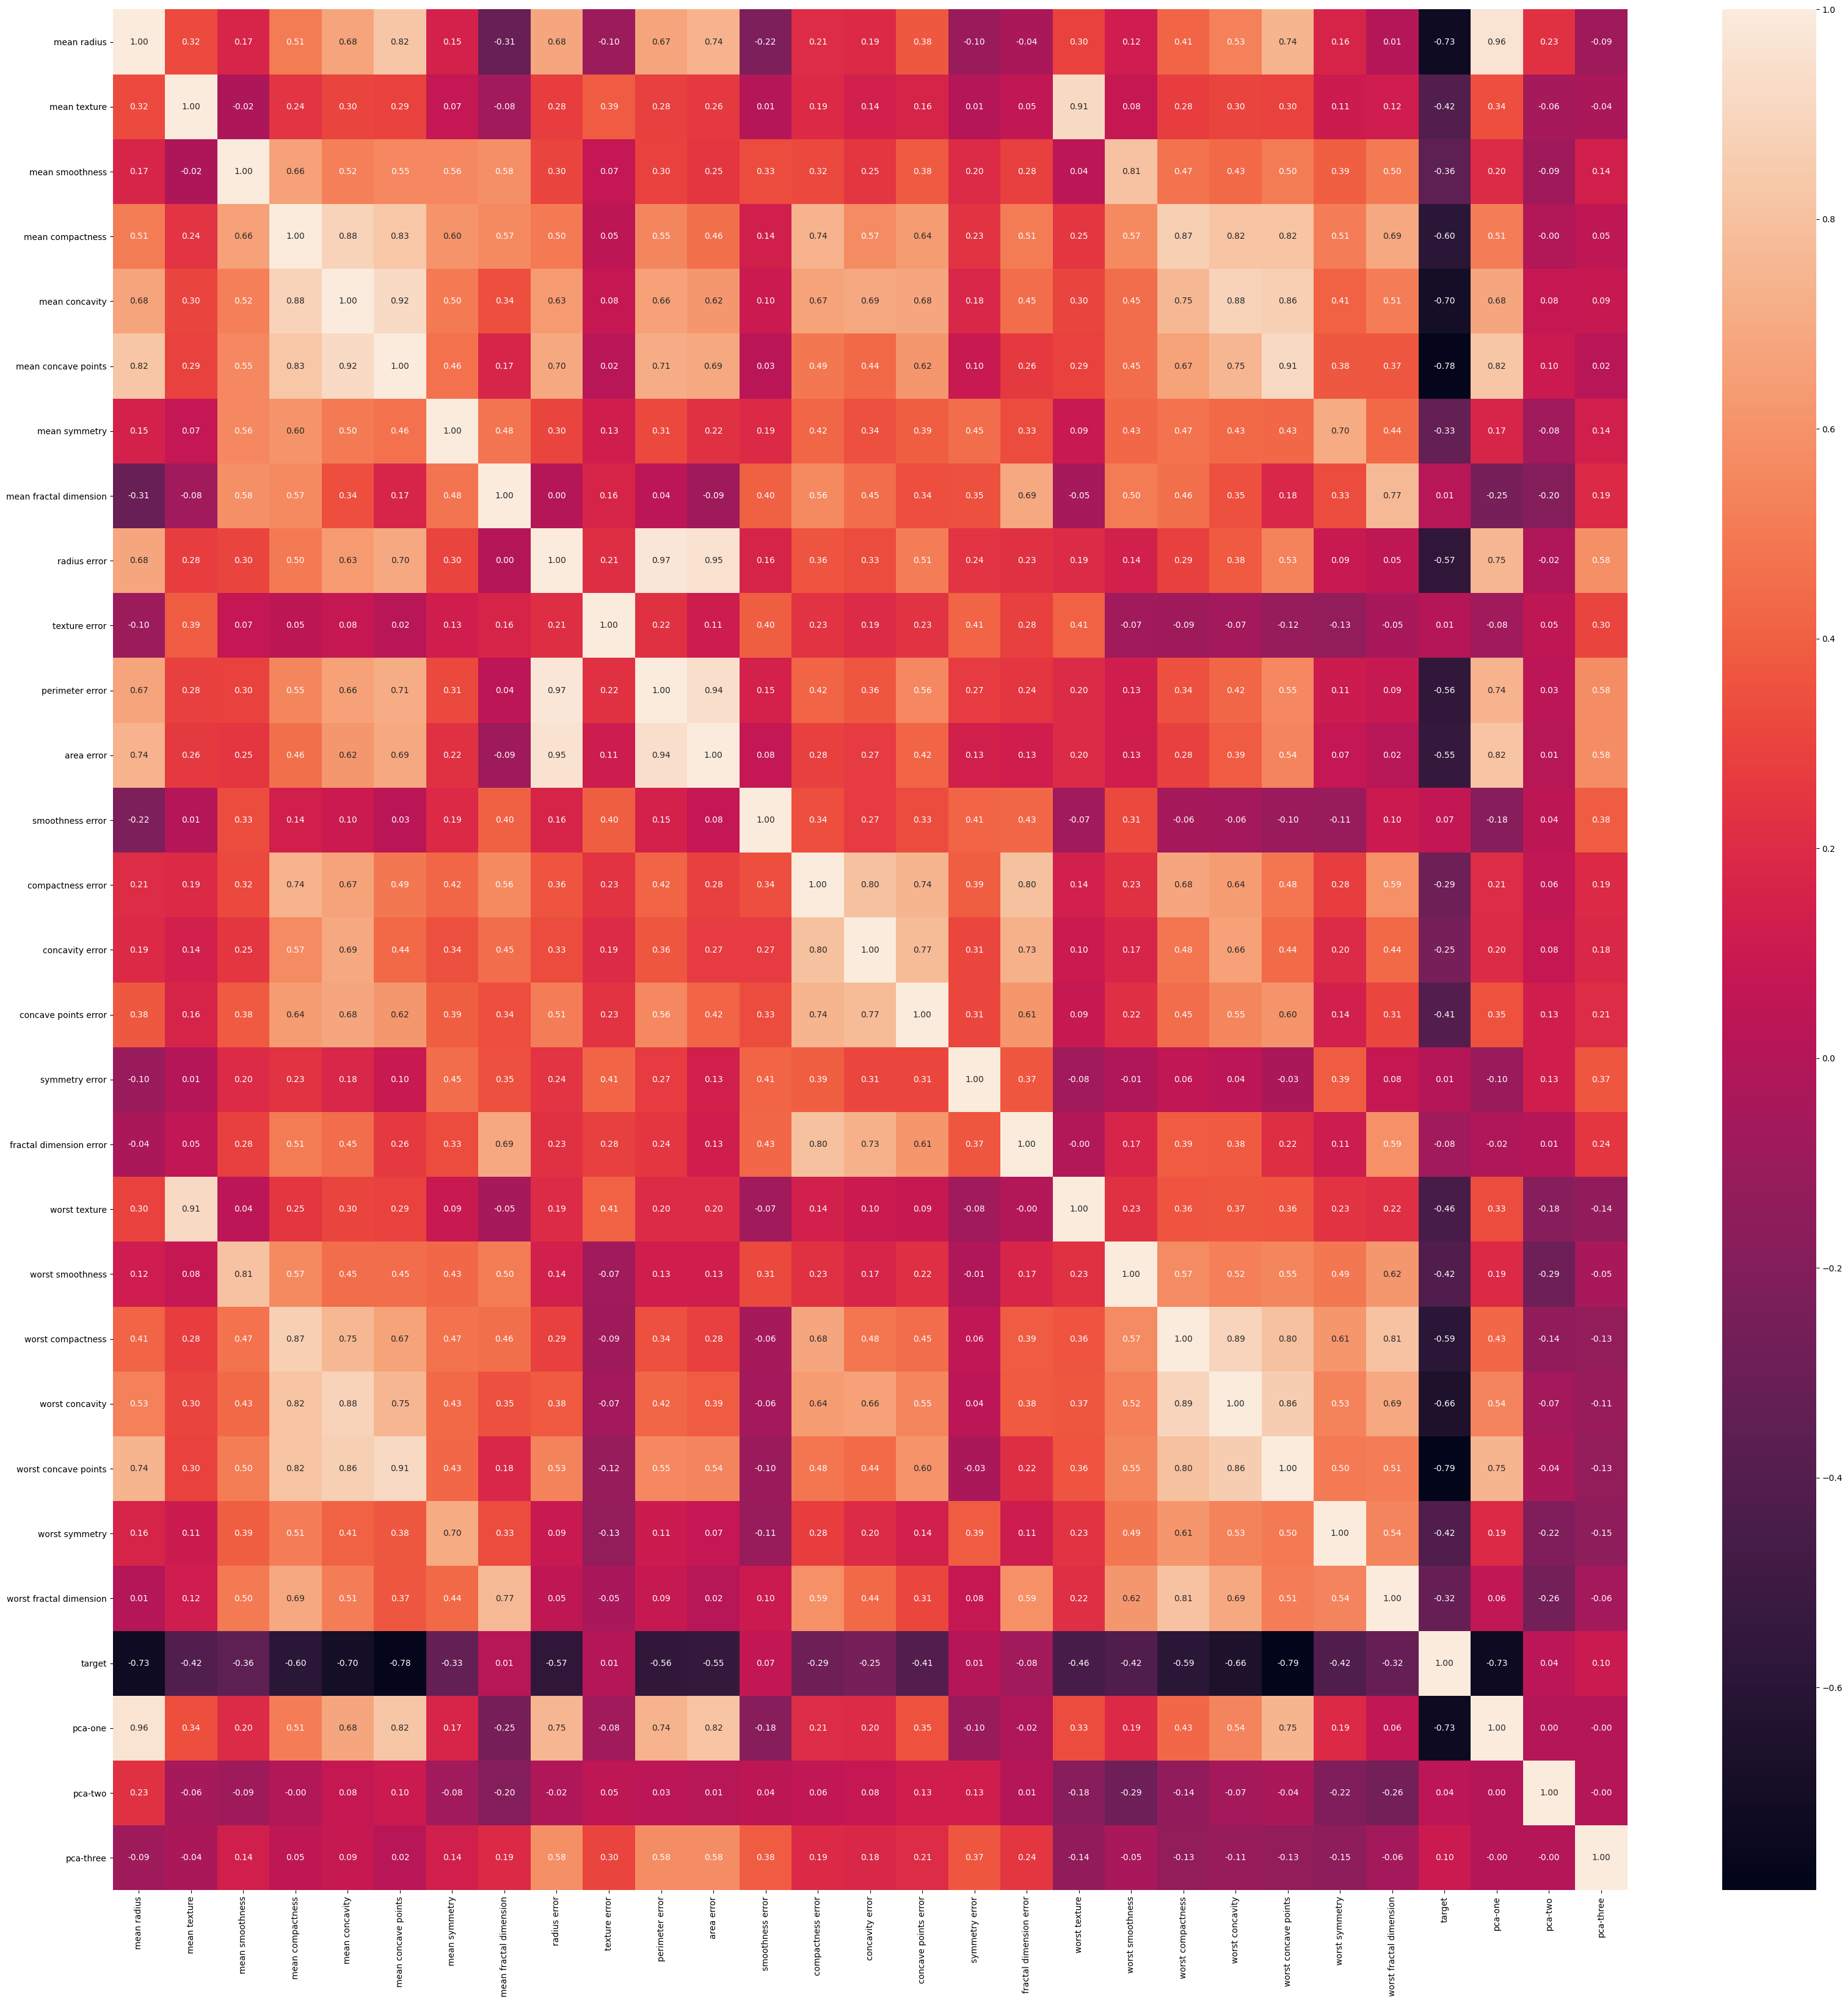

In [189]:
display_corr_matrix(df.corr(), '')

Отсеивание признаков по корреляционной матрице 


In [188]:
df = df.drop([
    'mean perimeter', 
    'mean area', 
    'worst radius', 
    'worst perimeter',  
    'worst area', 
], axis=1)


In [ ]:
# Выбросы - 


Разделение на train test  

In [136]:
y = df['target']
# Уберем признаки PCA, target и линейно зависимые признаки
X = df.drop([
    'pca-one', 
    'pca-two', 
    'pca-three', 
    'target'
], axis=1)

In [ ]:
# Готовый набор данных для обучения 

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

### Определим методы классификации

Метод опорных векторов (англ. SVM, support vector machine) — набор схожих алгоритмов обучения с учителем, использующихся для задач классификации и регрессионного анализа. Принадлежит семейству линейных классификаторов и может также рассматриваться как частный случай регуляризации по Тихонову. Особым свойством метода опорных векторов является непрерывное уменьшение эмпирической ошибки классификации и увеличение зазора, поэтому метод также известен как метод классификатора с максимальным зазором.


![](images/SVM.png)

Метод K-ближайших соседей (англ. k-nearest neighbors algorithm, k-NN) — 
метрический алгоритм для автоматической классификации объектов или регрессии.
В случае использования метода для классификации объект присваивается тому классу, который является наиболее распространённым среди k соседей данного элемента, классы которых уже известны.
В случае использования метода для регрессии, объекту присваивается среднее значение по k ближайшим к нему объектам, значения которых уже известны.

![](images/KNN.png)

Они представляют собой иерархические древовидные структуры, состоящие из решающих правил вида «Если ..., то ...». Правила автоматически генерируются в процессе обучения на обучающем множестве и, поскольку они формулируются практически на естественном языке (например, «Если объём продаж более 1000 шт., то товар перспективный»), деревья решений как аналитические модели более вербализуемы и интерпретируемы, чем, скажем, нейронные сети.
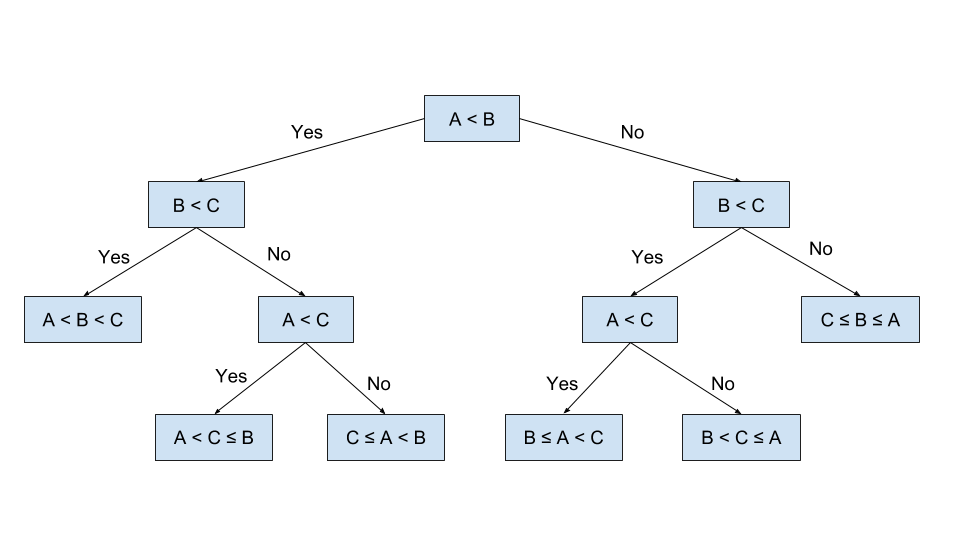

Иницциализация алгоритмов

In [191]:
SVC_model = SVC()
KNN_model = KNeighborsClassifier(n_neighbors=5)
DES_model = DecisionTreeClassifier(max_depth=5)

In [192]:
SVC_model.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [193]:
KNN_model.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [141]:
DES_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [142]:
SVC_predict = SVC_model.predict(X_test)

### оценка результатов алгоритма

![](conf_matrix.jpg)

### Оценка метода опорных векторов 

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.86      0.71      0.78        45
           1       0.83      0.93      0.88        69

    accuracy                           0.84       114
   macro avg       0.85      0.82      0.83       114
weighted avg       0.84      0.84      0.84       114


Confusion matrix:
[[32 13]
 [ 5 64]]


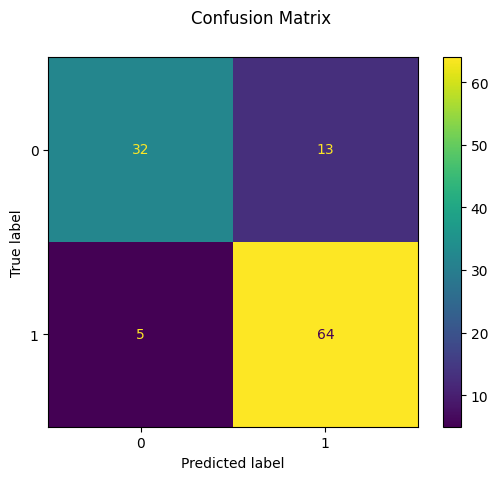

In [143]:
print("Classification report for classifier %s:\n%s\n"
      % (SVC_model, metrics.classification_report(y_test, SVC_predict)))
disp = metrics.plot_confusion_matrix(SVC_model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
plt.show()

### Оценка метода ближайших соседей

In [144]:
KNN_predict = KNN_model.predict(X_test)

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        45
           1       0.88      0.91      0.89        69

    accuracy                           0.87       114
   macro avg       0.87      0.86      0.86       114
weighted avg       0.87      0.87      0.87       114


Confusion matrix:
[[36  9]
 [ 6 63]]


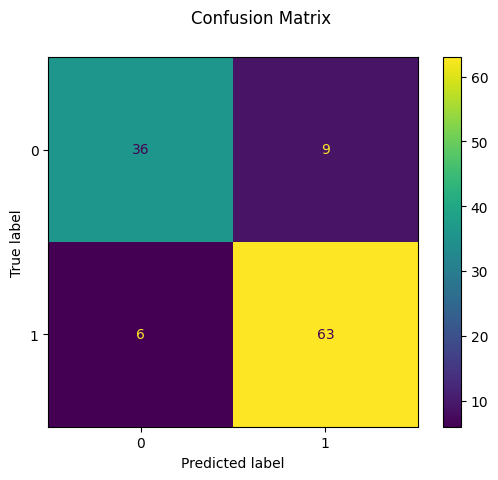

In [145]:
print("Classification report for classifier %s:\n%s\n"
      % (KNN_model, metrics.classification_report(y_test, KNN_predict)))
disp = metrics.plot_confusion_matrix(KNN_model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

### Оценка метода деревья решений

In [146]:
DES_predict = DES_model.predict(X_test)

Classification report for classifier DecisionTreeClassifier(max_depth=5):
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        45
           1       0.93      0.91      0.92        69

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114


Confusion matrix:
[[40  5]
 [ 6 63]]


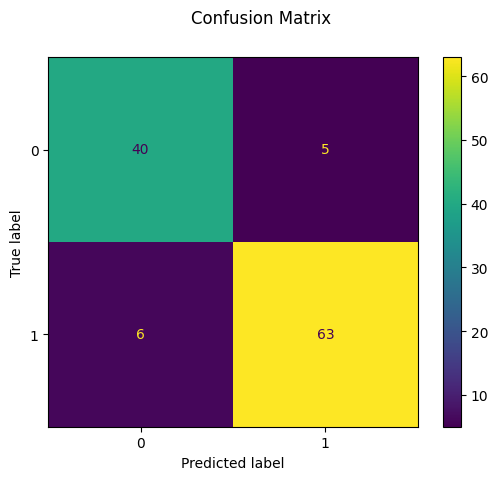

In [147]:
print("Classification report for classifier %s:\n%s\n"
      % (DES_model, metrics.classification_report(y_test, DES_predict)))
disp = metrics.plot_confusion_matrix(DES_model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

### Визуализация работы алгоритмов классификации


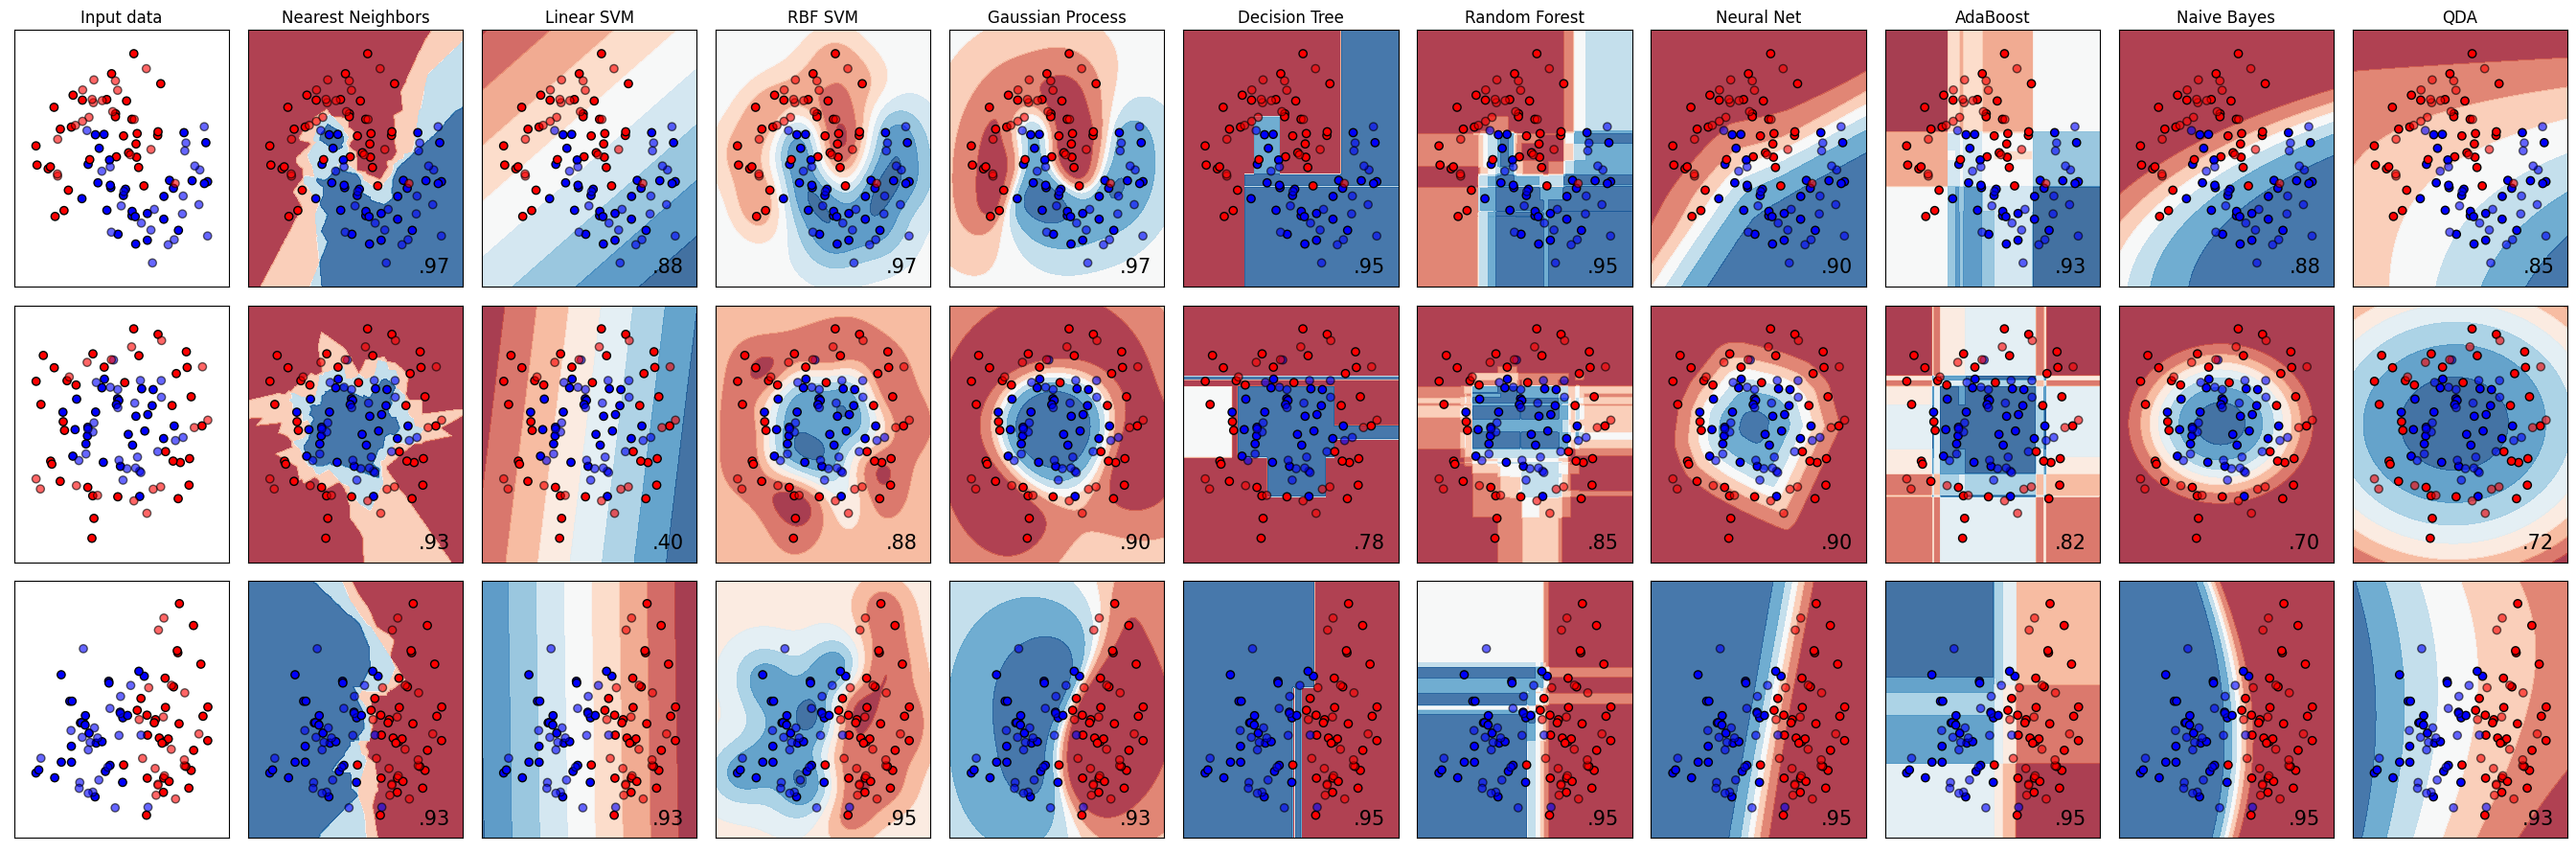

In [148]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

Boston house pricing
http://www.neural.cz/dataset-exploration-boston-house-pricing.html

In [150]:
real_estate = pd.read_csv('data/Real estate.csv')
#summary of real_estate data
real_estate.head()

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [151]:
real_estate.shape

(414, 8)

In [152]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [153]:
real_estate.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [154]:
real_estate.drop(['No'], axis=1, inplace=True)
# Дату мы не можем использовать 
real_estate.drop(['X1 transaction date'],axis=1, inplace=True)

In [155]:
real_estate.head()

X2 house age  X3 distance to the nearest MRT station  \
0          32.0                                84.87882   
1          19.5                               306.59470   
2          13.3                               561.98450   
3          13.3                               561.98450   
4           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  
3                        54.8  
4                        43.1

<Figure size 600x1200 with 0 Axes>

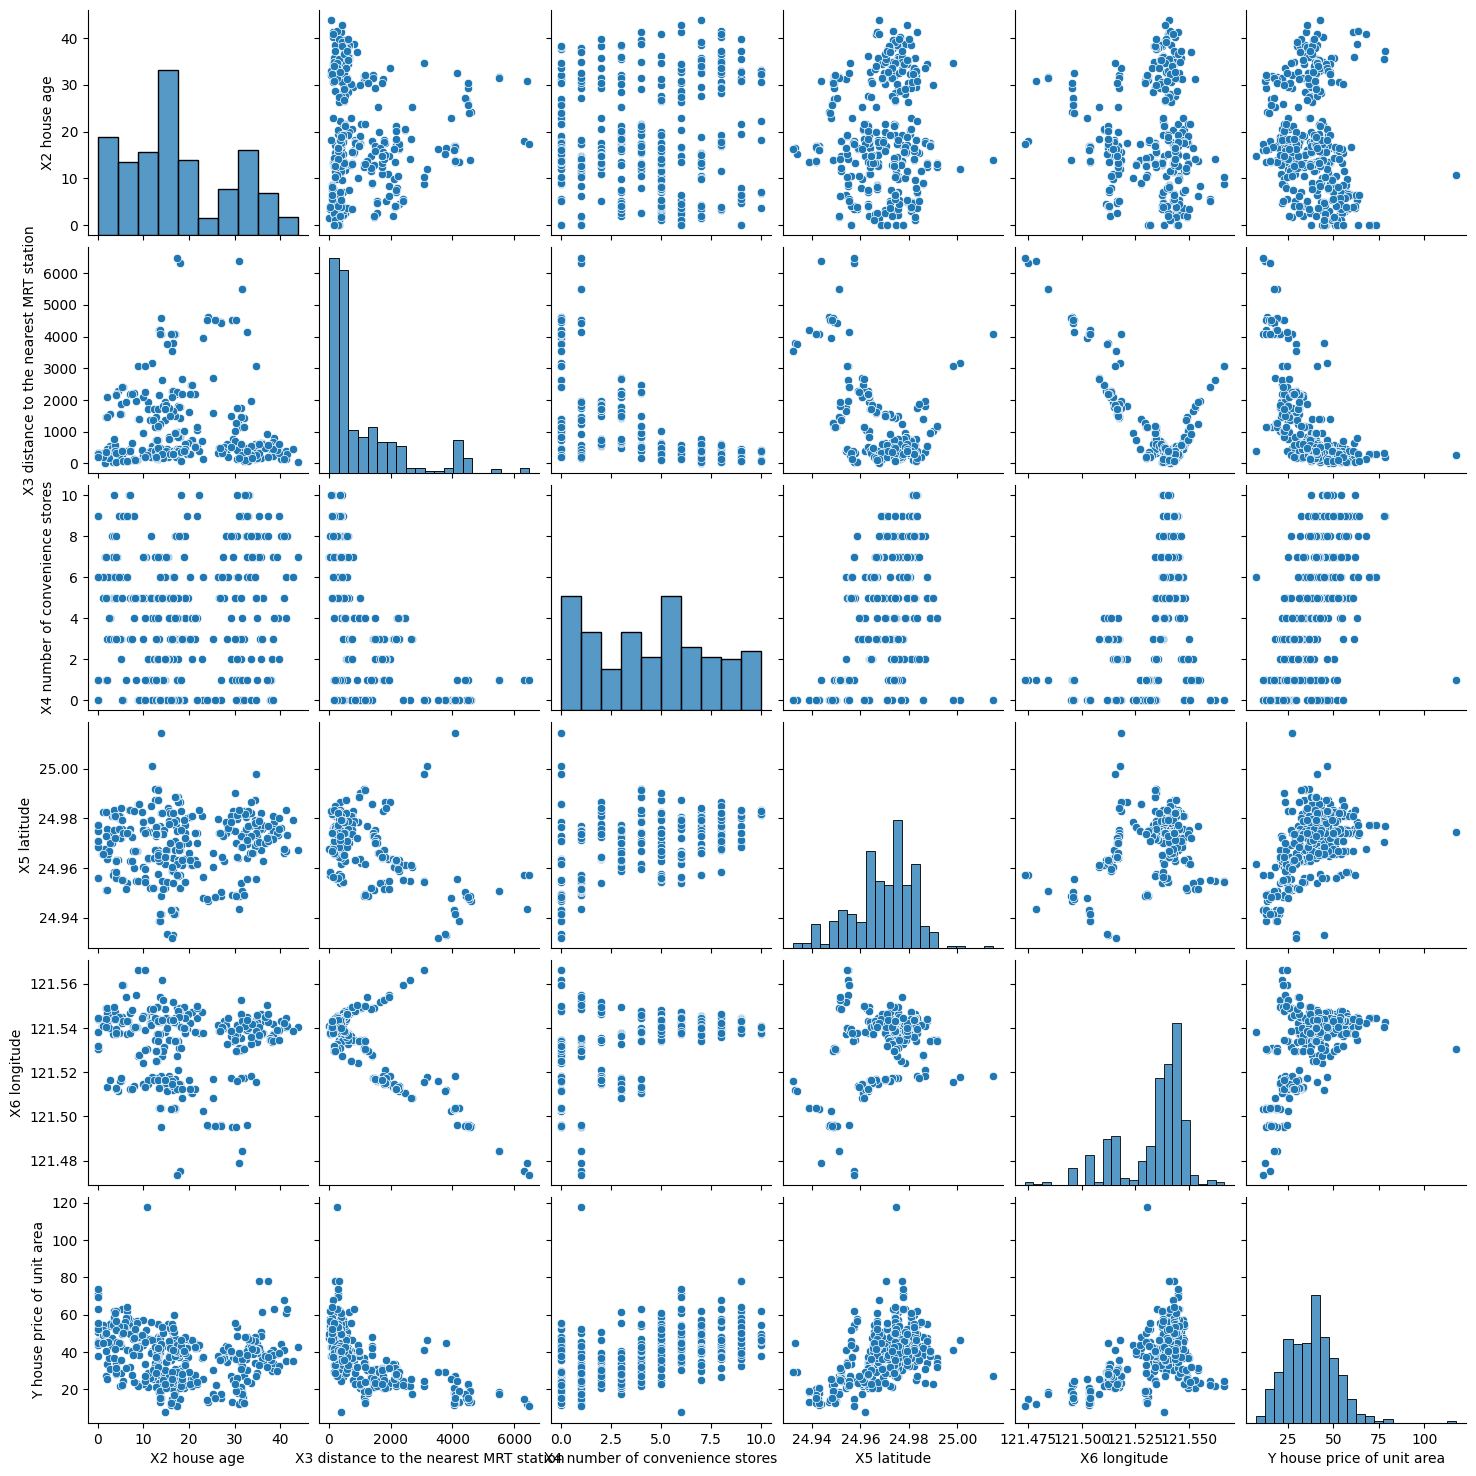

In [156]:
#Visualising all numeric variable
plt.figure(figsize=(6,12))
sns.pairplot(real_estate)
plt.show()

<AxesSubplot:>

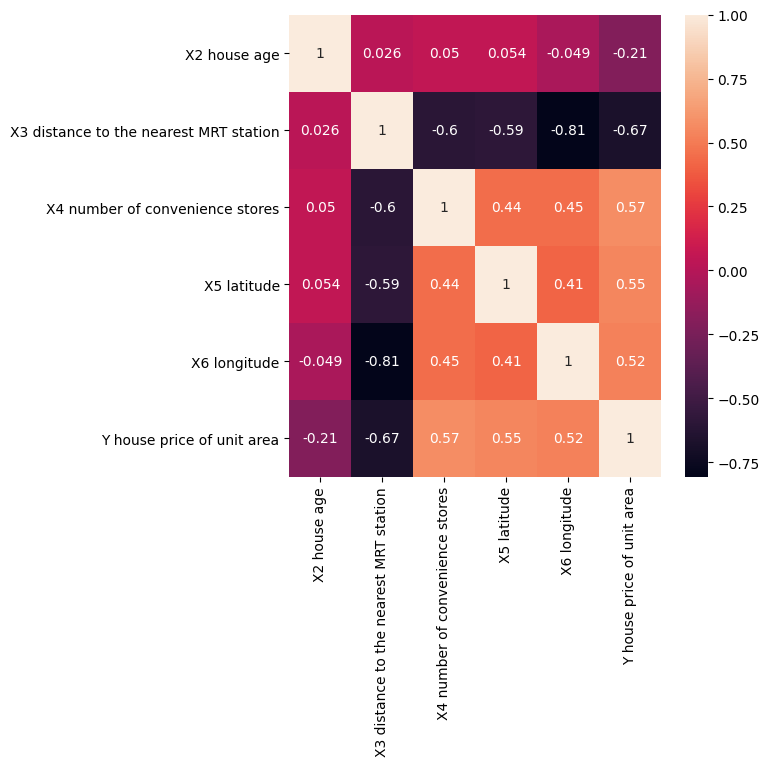

In [158]:
plt.figure(figsize=(6,6))
sns.heatmap(real_estate.corr(),annot=True)

In [159]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

df_train, df_test = train_test_split(real_estate, train_size=0.70, test_size=0.30,random_state=100)
df_train.head()

X2 house age  X3 distance to the nearest MRT station  \
287          19.2                                461.1016   
31           29.6                                769.4034   
209          34.8                                175.6294   
239          18.1                                837.7233   
47           35.9                                640.7391   

     X4 number of convenience stores  X5 latitude  X6 longitude  \
287                                5     24.95425     121.53990   
31                                 7     24.98281     121.53408   
209                                8     24.97347     121.54271   
239                                0     24.96334     121.54767   
47                                 3     24.97563     121.53715   

     Y house price of unit area  
287                        32.9  
31                         25.0  
209                        40.9  
239                        29.7  
47                         61.5

In [160]:
#Dividing X and y sets for model building
y_train = df_train.pop('Y house price of unit area')
X_train = df_train
y_train.head()

287    32.9
31     25.0
209    40.9
239    29.7
47     61.5
Name: Y house price of unit area, dtype: float64

In [161]:
X_train.head()

X2 house age  X3 distance to the nearest MRT station  \
287          19.2                                461.1016   
31           29.6                                769.4034   
209          34.8                                175.6294   
239          18.1                                837.7233   
47           35.9                                640.7391   

     X4 number of convenience stores  X5 latitude  X6 longitude  
287                                5     24.95425     121.53990  
31                                 7     24.98281     121.53408  
209                                8     24.97347     121.54271  
239                                0     24.96334     121.54767  
47                                 3     24.97563     121.53715

In [162]:
#import Linear regression
from sklearn.linear_model import LinearRegression
#fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [163]:
lm.coef_

array([-2.81980885e-01, -4.70761718e-03,  1.08604498e+00,  2.12564677e+02,
       -3.80314555e+01])

In [164]:
#The coefficient of all independent variable are as follows
coeff = pd.DataFrame(lm.coef_, X_train.columns, columns=['coefficient'])
coeff

coefficient
X2 house age                              -0.281981
X3 distance to the nearest MRT station    -0.004708
X4 number of convenience stores            1.086045
X5 latitude                              212.564677
X6 longitude                             -38.031455

In [165]:
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train)
lm_1 = sm.OLS(y_train, X_train).fit()
print(lm_1.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.942
Model:                                    OLS   Adj. R-squared (uncentered):              0.941
Method:                         Least Squares   F-statistic:                              930.6
Date:                        Fri, 18 Jun 2021   Prob (F-statistic):                   9.41e-174
Time:                                16:37:23   Log-Likelihood:                         -1065.4
No. Observations:                         289   AIC:                                      2141.
Df Residuals:                             284   BIC:                                      2159.
Df Model:                                   5                                                  
Covariance Type:                    nonrobust                                                  
                                        

VIF означает "variance inflation factor", что переводится на русский язык как "фактор инфляции дисперсии" - чем он выше для j-го предиктора, тем сильнее линейная связь между этим и остальными предикторами. ... Обычно критическим считают значение VIF = 5, несколько реже VIF = 10.

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
0                                   const  2.071049e+08
2  X3 distance to the nearest MRT station  4.510000e+00
5                            X6 longitude  3.170000e+00
3         X4 number of convenience stores  1.600000e+00
4                             X5 latitude  1.590000e+00
1                            X2 house age  1.020000e+00

In [168]:
y_train_price = lm_1.predict(X_train)

Гистограмма распределения ошибок

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Error')

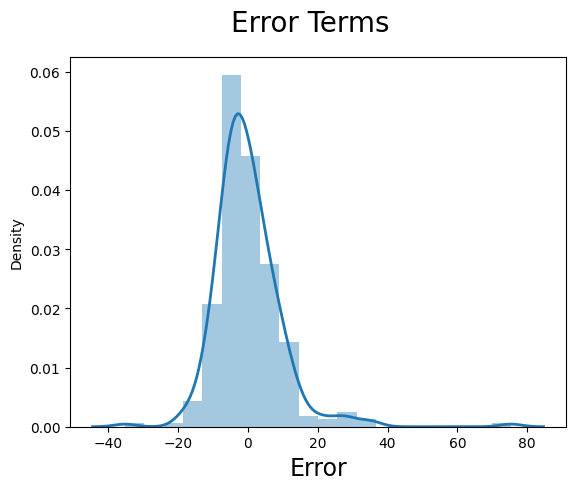

In [169]:
#plot histogram of error terms
fig = plt.figure()
sns.distplot((y_train-y_train_price), bins=20)
fig.suptitle('Error Terms',fontsize = 20)
plt.xlabel('Error',fontsize=17)

Оценка результатов 

In [170]:
y_test = df_test.pop('Y house price of unit area')
X_test = df_test
y_test_pred = lm_1.predict(X_test)


In [171]:
#import library
from sklearn.metrics import r2_score

Коэффициент детерминации — это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью зависимости, то есть объясняющими переменными. Более точно — это единица минус доля необъяснённой дисперсии (дисперсии случайной ошибки модели, или условной по факторам дисперсии зависимой переменной) в дисперсии зависимой переменной. Его рассматривают как универсальную меру зависимости одной случайной величины от множества других. В

In [117]:
#Evaluate r2
r2_score(y_true=y_test,y_pred=y_test_pred)

0.6584961501011914

Построим сравнительные графики для оценки качества модели

In [118]:
df = pd.DataFrame({'Actual':y_test,'Predictions':y_test_pred})
df['Predictions']= round(df['Predictions'])
df.head()

Actual  Predictions
121    48.0         42.0
353    31.3         36.0
96     59.5         52.0
43     34.1         42.0
125    48.6         48.0

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Actual', ylabel='Predictions'>

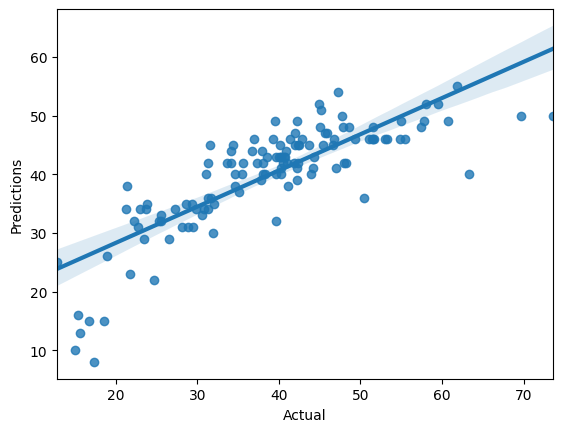

In [119]:
sns.regplot('Actual','Predictions',data=df)

In [120]:
from sklearn import metrics

# Mean absolute error(MAE)
print('MAE',metrics.mean_absolute_error(y_test,y_test_pred))

#Mean squared error(MSE)
# Средний квадрат отклонения (MSE – Mean Squared Error)
print('MSE',metrics.mean_squared_error(y_test,y_test_pred))

#Root mean squared error(RMSE)
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

MAE 5.423374508833668
MSE 47.86553891850771
RMSE 6.918492532228947


Automatically created module for IPython interactive environment


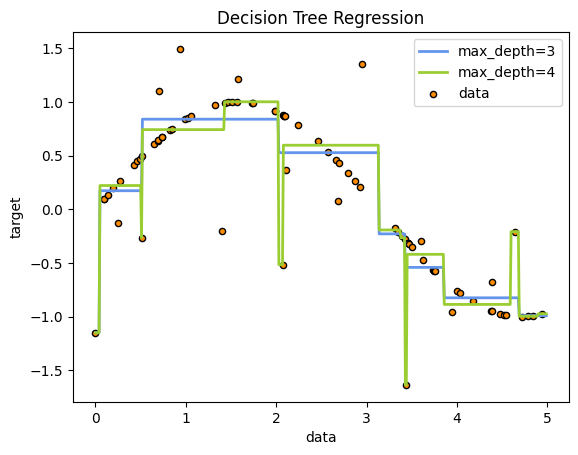

In [121]:
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
first_depth=3
second_depth=4
regr_1 = DecisionTreeRegressor(max_depth=first_depth)
regr_2 = DecisionTreeRegressor(max_depth=second_depth)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label=f"max_depth={first_depth}", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label=f"max_depth={second_depth}", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Полезные ссылки 
 - https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py
 - https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e